In [9]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

In [10]:
PATH = "/home/cuneyt/Desktop/projects/python_projects/Python4Finance/Stocks/"

S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 18
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]
tickers

tickers.sort()
tickers

['A',
 'AA',
 'AAL',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AAWW',
 'ABBV',
 'ABC',
 'ABCB',
 'ABEO',
 'ABG',
 'ABIO',
 'ABM',
 'ABMD',
 'ABR',
 'ABT',
 'AC',
 'ACA',
 'ACAD',
 'ACCO',
 'ACER',
 'ACGL',
 'ACHC',
 'ACHV',
 'ACIW',
 'ACLS',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACOR',
 'ACRE',
 'ACRS',
 'ACRX',
 'ACTG',
 'ACU',
 'ADBE',
 'ADC',
 'ADES',
 'ADI',
 'ADM',
 'ADMA',
 'ADMP',
 'ADNT',
 'ADP',
 'ADSK',
 'ADT',
 'ADTN',
 'ADUS',
 'ADVM',
 'ADXS',
 'AE',
 'AEE',
 'AEHR',
 'AEIS',
 'AEL',
 'AEMD',
 'AEO',
 'AEP',
 'AES',
 'AEY',
 'AFG',
 'AFL',
 'AGCO',
 'AGE',
 'AGEN',
 'AGFS',
 'AGIO',
 'AGLE',
 'AGM',
 'AGNC',
 'AGO',
 'AGR',
 'AGRX',
 'AGS',
 'AGX',
 'AGYS',
 'AHH',
 'AHT',
 'AIG',
 'AIMC',
 'AIN',
 'AINC',
 'AIR',
 'AIRG',
 'AIRI',
 'AIRT',
 'AIT',
 'AIV',
 'AIZ',
 'AJG',
 'AJRD',
 'AJX',
 'AKAM',
 'AKBA',
 'AKR',
 'AKTS',
 'AL',
 'ALB',
 'ALBO',
 'ALCO',
 'ALDX',
 'ALE',
 'ALEC',
 'ALEX',
 'ALG',
 'ALGN',
 'ALGT',
 'ALIM',
 'ALJJ',
 'ALK',
 'ALKS',
 'ALL

In [11]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

def save_dataframe_to_csv(df, ticker):
    df.to_csv(PATH + ticker + '.csv')

def get_valid_dates(df, sdate, edate):
    try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
    
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    
        date_leading = '-'.join(('0' if len(x)<2 else '')+x for x in sm_date.split('-'))
        date_ending = '-'.join(('0' if len(x)<2 else '')+x for x in last_date.split('-'))
        print(date_leading, " ", date_ending)
    except Exception:
        print("Date Corrupted")
    else:
        return date_leading, date_ending

def roi_between_dates(df, sdate, edate):
    try:
        start_val = df.loc[sdate,'Adj Close'] 
        end_val = df.loc[edate,'Adj Close']
        roi = ((end_val - start_val) / start_val)
    except Exception:
        print("Data Corrupted")
    else:
        return roi

def get_mean_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].mean()

def get_sd_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]["Adj Close"].std()

def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_sd_between_dates(df, sdate, edate)
    return sd / mean

In [12]:
tickers[0]
print("Dataframe for Ticker", tickers[0], '\n')

stock_a = get_df_from_csv(tickers[0])
print(stock_a, '\n')

print(get_valid_dates(stock_a, '2020-01-01', '2020-12-31'), '\n')
sdate, edate = get_valid_dates(stock_a, '2020-01-01', '2020-12-31')

print("Adj Close Mean :", get_mean_between_dates(stock_a, sdate, edate))
print("Adj Close Standard Deviation :", get_sd_between_dates(stock_a, sdate, edate))
print("Adj Close Coefficient of Variation :", get_cov_between_dates(stock_a, sdate, edate))

stock_a = stock_a.set_index(['Date'])
print(stock_a, '\n')

print("Return on Investment since 2020:", roi_between_dates(stock_a, sdate, edate))

Dataframe for Ticker A 

      Unnamed: 0        Date   Adj Close  daily_return
0              0  2017-01-03   44.367439           NaN
1              1  2017-01-04   44.949589      0.013121
2              2  2017-01-05   44.415157     -0.011890
3              3  2017-01-06   45.798946      0.031156
4              4  2017-01-09   45.942097      0.003126
...          ...         ...         ...           ...
1160        1160  2021-08-12  156.714447      0.010414
1161        1161  2021-08-13  157.784637      0.006829
1162        1162  2021-08-16  160.598892      0.017836
1163        1163  2021-08-17  159.449417     -0.007157
1164        1164  2021-08-18  161.540253      0.013113

[1165 rows x 4 columns] 

2020-01-02   2020-12-31
('2020-01-02', '2020-12-31') 

2020-01-02   2020-12-31
Adj Close Mean : 91.04741735306997
Adj Close Standard Deviation : 13.68506702613215
Adj Close Coefficient of Variation : 0.15030703147858934
            Unnamed: 0   Adj Close  daily_return
Date               

In [13]:
def get_cov_ror(tickers, sdate, edate):
    col_names = ["Ticker", "COV", "ROI"]
    df = pd.DataFrame(columns = col_names)
    
    for ticker in tickers:
        print("Working on :", ticker)
        s_df = get_df_from_csv(ticker)
        
        sdate2, edate2 = get_valid_dates(s_df, sdate, edate)

        cov = get_cov_between_dates(s_df, sdate2, edate2)
        s_df = s_df.set_index(['Date'])
        roi = roi_between_dates(s_df, sdate2, edate2)

        df.loc[len(df.index)] = [ticker, cov, roi]
    return df

In [15]:
market_df = get_cov_ror(tickers, '2017-01-03', '2021-08-18')

Working on : A
2017-01-04   2021-08-18
Working on : AA
2017-01-04   2021-08-18
Working on : AAL
2017-01-04   2021-08-18
Working on : AAME
2017-01-04   2021-08-18
Working on : AAN
2020-11-25   2021-08-18
Working on : AAOI
2017-01-04   2021-08-18
Working on : AAON
2017-01-04   2021-08-18
Working on : AAP
2017-01-04   2021-08-18
Working on : AAPL
2017-01-04   2021-08-18
Working on : AAT
2017-01-04   2021-08-18
Working on : AAWW
2017-01-04   2021-08-18
Working on : ABBV
2017-01-04   2021-08-18
Working on : ABC
2017-01-04   2021-08-18
Working on : ABCB
2017-01-04   2021-08-18
Working on : ABEO
2017-01-04   2021-08-18
Working on : ABG
2017-01-04   2021-08-18
Working on : ABIO
2017-01-04   2021-08-18
Working on : ABM
2017-01-04   2021-08-18
Working on : ABMD
2017-01-04   2021-08-18
Working on : ABR
2017-01-04   2021-08-18
Working on : ABT
2017-01-04   2021-08-18
Working on : AC
2017-01-04   2021-08-18
Working on : ACA
2018-11-05   2021-08-18
Working on : ACAD
2017-01-04   2021-08-18
Working o

In [16]:
market_df.sort_values(by=['ROI'], ascending=False).head(20)

,Ticker,COV,ROI
32,ACMR,0.888902,13.851783
150,AMRC,0.787676,10.342106
137,AMD,0.738741,8.049869
111,ALGN,0.479627,5.906618
41,ADBE,0.434883,5.018533
160,AMTX,1.625315,4.535715
8,AAPL,0.525511,4.352989
122,ALNY,0.314982,3.783967
81,AGYS,0.596460,3.700000
162,AMZN,0.415434,3.227819


          AMZN       AAL      ANET      ANIK
754   0.027151  0.014296  0.006490  0.010608
755  -0.012139 -0.049502 -0.018904 -0.013740
756   0.014886 -0.011935  0.010007  0.046053
757   0.002092 -0.003660  0.009810 -0.021088
758  -0.007809  0.022777  0.010398 -0.019463
...        ...       ...       ...       ...
1002 -0.003949 -0.014475  0.008203 -0.020186
1003  0.035071  0.025543  0.007270  0.022917
1004  0.011584 -0.012453 -0.011824 -0.030097
1005 -0.010882  0.018285  0.005078  0.045030
1006 -0.008801 -0.023529  0.005572  0.010493

[253 rows x 4 columns] 

          AMZN       AAL      ANET      ANIK
AMZN  1.000000  0.070946  0.476018  0.200142
AAL   0.070946  1.000000  0.231709  0.350969
ANET  0.476018  0.231709  1.000000  0.305864
ANIK  0.200142  0.350969  0.305864  1.000000 

AMZN    1.000000
AAL     0.070946
ANET    0.476018
ANIK    0.200142
Name: AMZN, dtype: float64 

Axes(0.125,0.11;0.775x0.77)


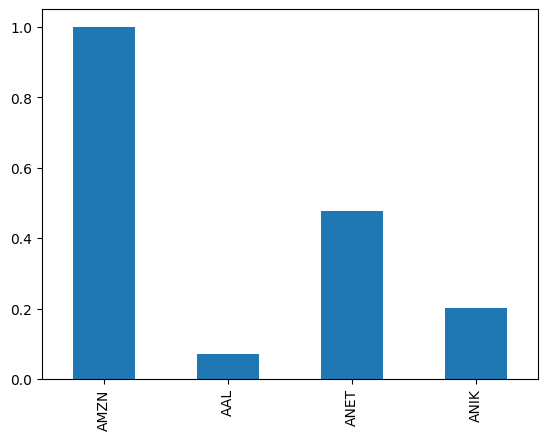

In [23]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    
    for x in tickers:
        df = get_df_from_csv(x)
        df['Date'] = pd.to_datetime(df['Date'])

        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[x] = df.loc[mask][col_name]
        
    return mult_df

faang_list = ["AMZN", "AAL", "ANET", "ANIK"]
mult_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *faang_list)
print(mult_df, '\n')

print(mult_df.corr(), '\n')

print(mult_df.corr()['AMZN'], '\n')

print(mult_df.corr()['AMZN'].plot(kind='bar'))

In [24]:
mult_df['AMZN'].var()

days = len(mult_df.index)

nflx_a_var = mult_df['AMZN'].var() * 253
nflx_a_var

0.14891809636915296

In [25]:
mult_df.cov() * 253

,AMZN,AAL,ANET,ANIK
AMZN,0.148918,0.028575,0.089917,0.047689
AAL,0.028575,1.089342,0.118378,0.226182
ANET,0.089917,0.118378,0.239602,0.092445
ANIK,0.047689,0.226182,0.092445,0.381254


In [28]:
# Let's create a portfolio made up of Facebook & Newmont Corporation
port_list = ["AMZN", "AAL"]
port_df = merge_df_by_column_name('daily_return',  '2020-1-1', '2020-12-31', *port_list)
print(port_df, '\n')

print(port_df.corr(), '\n')

price_df = merge_df_by_column_name('Adj Close',  '2020-1-1', '2020-12-31', *["AMZN","AAL"])
print(price_df.head(), '\n')

fb_wt = 209.78 / 418.48
nem_wt = 208.70 / 418.48
fb_wt = .5012
nem_wt = .4988
wts = np.array([fb_wt, nem_wt])

wts.T
port_var = np.dot(wts.T, np.dot(port_df.cov() * 253, wts))
print("Portfolio Var :", port_var)
print("AMZN Var :", port_df["AMZN"].var() * 253)
print("AAL Var :", port_df["AAL"].var() * 253)

          AMZN       AAL
754   0.027151  0.014296
755  -0.012139 -0.049502
756   0.014886 -0.011935
757   0.002092 -0.003660
758  -0.007809  0.022777
...        ...       ...
1002 -0.003949 -0.014475
1003  0.035071  0.025543
1004  0.011584 -0.012453
1005 -0.010882  0.018285
1006 -0.008801 -0.023529

[253 rows x 2 columns] 

          AMZN       AAL
AMZN  1.000000  0.070946
AAL   0.070946  1.000000 

          AMZN        AAL
754  94.900497  28.982893
755  93.748497  27.548195
756  95.143997  27.219410
757  95.343002  27.119778
758  94.598503  27.737495 

Portfolio Var : 0.3227256089753725
AMZN Var : 0.14891809636915296
AAL Var : 1.0893415343926411
